In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

--2022-06-29 16:40:09--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.81MB/s    in 0.3s    

2022-06-29 16:40:10 (1.81 MB/s) - ‘spam.csv’ saved [503663/503663]



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# rename columns
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values

In [6]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [7]:
# convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test =tokenizer.texts_to_sequences(df_test)

In [8]:
# get word -> int mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens' % V)

Found 7137 unique tokens


In [9]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [10]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [13]:
# create the model

# embedding dimensionality
D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D) (i)
x = Conv1D(32, 3, activation='relu') (x)
x = MaxPooling1D(3) (x)
x = Conv1D(64, 3, activation='relu') (x)
x = MaxPooling1D(3) (x)
x = Conv1D(128, 3, activation='relu') (x)
x = GlobalMaxPooling1D() (x)
x = Dense(1, activation='sigmoid') (x)

model = Model(i, x)

In [14]:
# compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs=5,
    validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/5
117/117 [==============================] - 9s 46ms/step - loss: 0.3864 - accuracy: 0.8604 - val_loss: 0.2579 - val_accuracy: 0.8651
Epoch 2/5
117/117 [==============================] - 3s 28ms/step - loss: 0.1473 - accuracy: 0.9373 - val_loss: 0.1757 - val_accuracy: 0.9521
Epoch 3/5
117/117 [==============================] - 3s 22ms/step - loss: 0.0361 - accuracy: 0.9898 - val_loss: 0.0508 - val_accuracy: 0.9853
Epoch 4/5
117/117 [==============================] - 2s 21ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0515 - val_accuracy: 0.9869
Epoch 5/5
117/117 [==============================] - 3s 23ms/step - loss: 0.0038 - accuracy: 0.9997 - val_loss: 0.0567 - val_accuracy: 0.9853


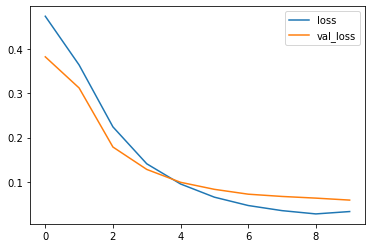

In [ ]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

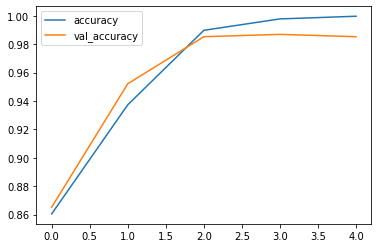

In [15]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()